# Brief EDA: Happiness Report 2019
Before I begin, I have to say that this dataset is not the best to work with. This dataset consists of rankings and not actual values. For example, instead of a value for GDP per capita, this dataset will provide a rank to a country (1 being the best). Still though, the dataset is fun to visualize and play around with, just not ideal. 

To begin, we will write all of our necessary imports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import os
print(os.listdir("../input"))

['world-happiness-report-2019.csv']


We will now load in our data and print the shape.

In [2]:
data = pd.read_csv('../input/world-happiness-report-2019.csv')
print('Rows in Data: ', data.shape[0])
print('Columns in Data: ', data.shape[1])

Rows in Data:  156
Columns in Data:  11


We can view the top five ranking countries and the bottom five ranking countries.

In [3]:
data.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
data.tail(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


I wanted to rename the column name "Country (region)". I thought it just looked ugly. I did not bother with renaming some other columns just yet.

In [5]:
data = data.rename({'Country (region)':'Country'}, axis=1)
data.dtypes

Country                      object
Ladder                        int64
SD of Ladder                  int64
Positive affect             float64
Negative affect             float64
Social support              float64
Freedom                     float64
Corruption                  float64
Generosity                  float64
Log of GDP\nper capita      float64
Healthy life\nexpectancy    float64
dtype: object

We can make a heatmap of the data.

There is something to be learned from this heatmap. We can see that social support, GDP per capita, and health are all positively correlated with the countries ranking. This means that countries who ranked highest in the happiness category typically ranked higher in the categories I just mentioned.

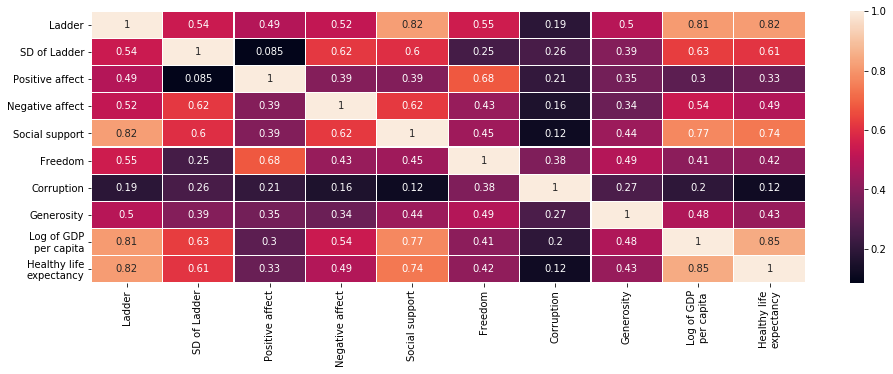

In [6]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(), annot=True, linewidths=.2)

We can now make a map of the world and to show where the happiest and unhappiest countries are. For this visualization, the darker red a country is, the less happy or satisfied they are. The lighter colored countries are the happier ones.

In [7]:
map_data = [go.Choropleth( 
           locations = data['Country'],
           locationmode = 'country names',
           z = data["Ladder"], 
           text = data['Country'],
           colorbar = {'title':'Ladder Rank'})]

layout = dict(title = 'Least Satisfied Countries', 
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))

world_map = go.Figure(data=map_data, layout=layout)
iplot(world_map)

To quickly show the top countries with the highest GDP per capita rank, we can sort the data by the GDP column, them print out the top five.

In [8]:
GDP = data.sort_values(by='Log of GDP\nper capita')
GDP.head(5)

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0
13,Luxembourg,14,3,62.0,19.0,27.0,28.0,9.0,30.0,2.0,16.0
33,Singapore,34,5,38.0,2.0,36.0,20.0,1.0,21.0,3.0,1.0
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0


Again, we can make a map of the world and this time show the "Freedom" feature. Remember, the darker the red, the lower the ranking. This means that red countries have less freedom.

In [9]:
map_data = [go.Choropleth( 
           locations = data['Country'],
           locationmode = 'country names',
           z = data["Freedom"], 
           text = data['Country'],
           colorbar = {'title':'Ladder Rank'})]

layout = dict(title = 'Countries With Least Freedom', 
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))

world_map = go.Figure(data=map_data, layout=layout)
iplot(world_map)